In [22]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('/data2/borito1907/sandcastles/data/texts/entropy_control_unwatermarked_entropy.csv')
df['entropies'] = df['entropies'].apply(lambda x: ast.literal_eval(str(x)))
df['entropy_sum_after_length'] = df.apply(
    lambda row: sum(row['entropies'][row['length'] :]),
    axis=1
)
df['entropy_sum'] = df.apply(
    lambda row: sum(row['entropies']),
    axis=1
)

df_grouped = (
    df
    .groupby('entropy_level', as_index=False)
    .agg(
        entropy=('entropy_sum_after_length', 'mean'),
    )
)


In [44]:
df_grouped

,entropy_level,entropy
0,1,404.529823
1,2,434.320411
2,3,387.591084
3,4,388.354464
4,5,408.812573
5,6,404.624478
6,7,409.462899
7,8,399.171176
8,9,429.546632
9,10,409.547323


In [48]:
df_grouped = (
    df
    .groupby('domain', as_index=False)
    .agg(
        entropy=('entropy_sum_after_length', 'mean')
    )
)

df_grouped

,domain,entropy
0,creative,411.436132
1,education,368.340759
2,journalism,443.011367


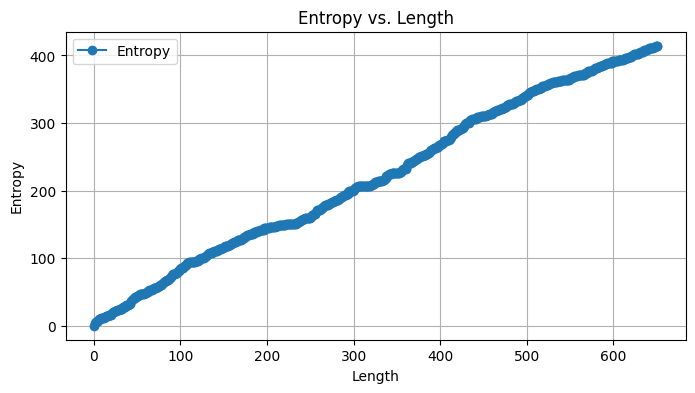

In [40]:
def entropy_plot(row):
    row_length = row['length']
    entropies = row['entropies'][row_length:]
    max_length = len(entropies)

    max_length = len(entropies)

    # cuts goes from 0 up to max_length
    cuts = range(max_length + 1)

    # For each cut, sum entropies[:cut]
    sum_before_cut = [sum(entropies[:cut]) for cut in cuts]

    # Plot: x = cut index, y = sum of entropies up to that cut
    plt.figure(figsize=(8, 4))
    plt.plot(cuts, sum_before_cut, marker='o', label='Entropy')

    plt.xlabel('Length')
    plt.ylabel('Entropy')
    plt.title('Entropy vs. Length')
    plt.legend()
    plt.grid(True)
    plt.show()

entropy_plot(df.iloc[0])

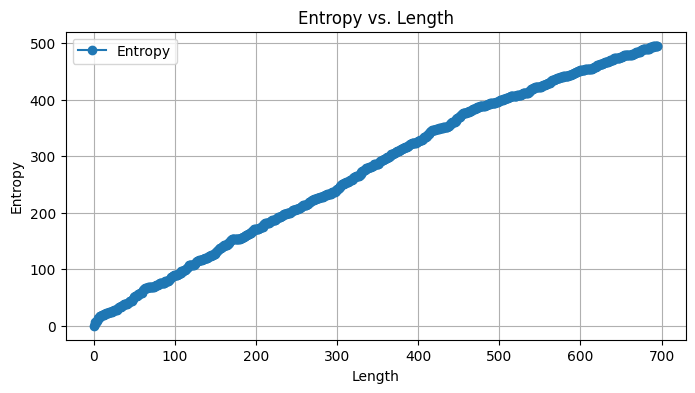

In [46]:
entropy_plot(df.iloc[7])

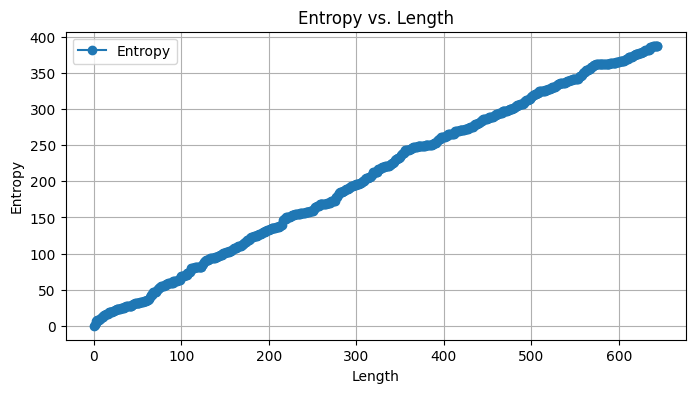

In [47]:
entropy_plot(df.iloc[15])